## Análise dos Dados de Créditos Alemães

Este dataset contém ao todo a classificação de crédito de 1000 clientes em um banco alemão. Associado a cada cliente existem 20 variáveis mais a variável classe (Target), com a classificação histórica de 700 clientes como adimplentes e 300 como idadimplentes. 

Os clientes adimplentes receberam o rótulo de classificação “1”, na variável resposta classe, e os clientes inadimplentes receberam o rótulo de classificação “0”.

Um ponto a se ressaltar nesta base de dados é o fato das classes “1” e “0” serem desequilibradas, ou seja, a quantidade de clientes adimplentes, é muito maior em relação aos clientes inadimplentes. Grandes diferenças entre as relações de adimplentes x inadimplentes tendem a impactar o desempenho dos modelos de classificação, com viés para a classe majoritária. 

Uma das abordagens mais utilizadas é o de balancear artificialmente o conjunto de dados: ou retirando exemplos aleatórios da classe majoritária (undersampling) ou acrescentando exemplos artificiais para a classe minoritária (oversampling). 

Neste estudo, foi utilizada a técnica de retirar aleatoriamente exemplos da classe majoritária.

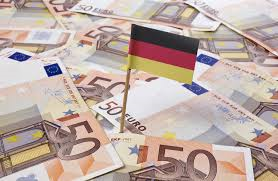

### Importando Bibliotecas Principais

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pp
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../input/german-credit-risk/german_credit.csv", sep=",")

In [3]:
df.head()

Creditability  Account Balance  Duration of Credit (month)  \
0              1                1                          18   
1              1                1                           9   
2              1                2                          12   
3              1                1                          12   
4              1                1                          12   

   Payment Status of Previous Credit  Purpose  Credit Amount  \
0                                  4        2           1049   
1                                  4        0           2799   
2                                  2        9            841   
3                                  4        0           2122   
4                                  4        0           2171   

   Value Savings/Stocks  Length of current employment  Instalment per cent  \
0                     1                             2                    4   
1                     1                             3                    2   
2                     2                             4                    2   
3                     1                             3                    3   
4                     1                             3                    4   

   Sex & Marital Status  ...  Duration in Current address  \
0                     2  ...                            4   
1                     3  ...                            2   
2                     2  ...                            4   
3                     3  ...                            2   
4                     3  ...                            4   

   Most valuable available asset  Age (years)  Concurrent Credits  \
0                              2           21                   3   
1                              1           36                   3   
2                              1           23                   3   
3                              1           39                   3   
4                              2           38                   1   

   Type of apartment  No of Credits at this Bank  Occupation  \
0                  1                           1           3   
1                  1                           2           3   
2                  1                           1           2   
3                  1                           2           2   
4                  2                           2           2   

   No of dependents  Telephone  Foreign Worker  
0                 1          1               1  
1                 2          1               1  
2                 1          1               1  
3                 2          1               2  
4                 1          1               2  

[5 rows x 21 columns]

### Verificando a presença de valores nulos

In [4]:
df.isnull().values.any()

False

### Verificando o tipo de dado de cada coluna

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
Creditability                        1000 non-null int64
Account Balance                      1000 non-null int64
Duration of Credit (month)           1000 non-null int64
Payment Status of Previous Credit    1000 non-null int64
Purpose                              1000 non-null int64
Credit Amount                        1000 non-null int64
Value Savings/Stocks                 1000 non-null int64
Length of current employment         1000 non-null int64
Instalment per cent                  1000 non-null int64
Sex & Marital Status                 1000 non-null int64
Guarantors                           1000 non-null int64
Duration in Current address          1000 non-null int64
Most valuable available asset        1000 non-null int64
Age (years)                          1000 non-null int64
Concurrent Credits                   1000 non-null int64
Type of apartment                    10

### Descrição dos ítens e categorias

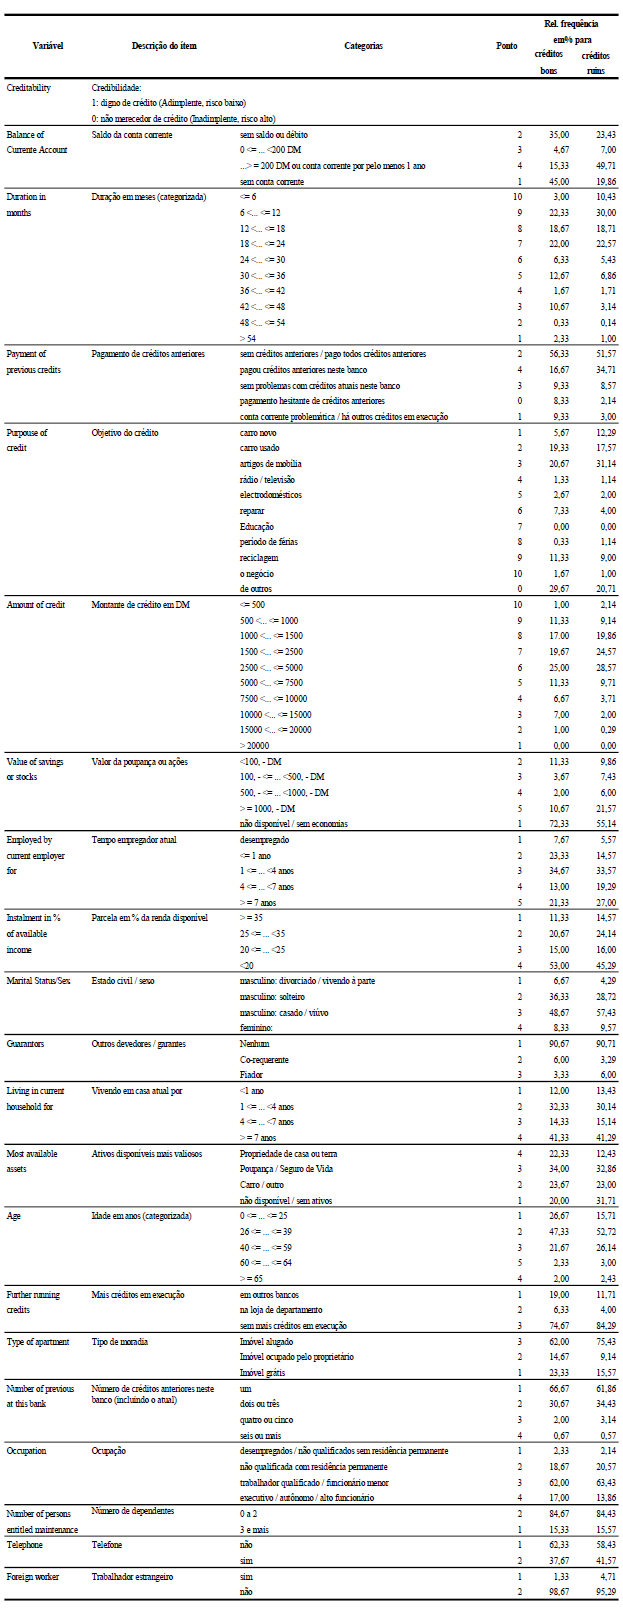

### Gráfico da variável target Creditability

In [6]:
import plotly.offline as py 
py.init_notebook_mode(connected=True) 
import plotly.graph_objs as go 
import plotly.tools as tls
import warnings 
from collections import Counter 

credit1 = go.Bar(x = df[df["Creditability"]== 1]["Creditability"].value_counts().index.values,
                y = df[df["Creditability"]== 1]["Creditability"].value_counts().values, name='Adimplentes')

credit0 = go.Bar(x = df[df["Creditability"]== 0]["Creditability"].value_counts().index.values,
                y = df[df["Creditability"]== 0]["Creditability"].value_counts().values, name='Inadimplentes')

data = [credit1, credit0]

layout = go.Layout()

layout = go.Layout(yaxis=dict(title='Quantidade'),xaxis=dict(title='Variável Classe'),title='Distribuição da Variável Classe', xaxis_type='category')

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='grouped-bar')

### Gráficos Age x Creditability

In [7]:
df_good = df.loc[df["Creditability"] == 1]['Age (years)'].values.tolist()
df_bad = df.loc[df["Creditability"] == 0]['Age (years)'].values.tolist()
df_age = df['Age (years)'].values.tolist()

#plot 1
credit1 = go.Histogram(x=df_good, histnorm='percent', name="Adimplentes")

#plot 2
credit0 = go.Histogram(x=df_bad, histnorm='percent', name="Inadimplentes")

#plot 3
creditT = go.Histogram(x=df_age, histnorm='percent', name="Geral")

#Grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Adimplentes','Inadimplentes', 'Geral'))

#Figs
fig.append_trace(credit1, 1, 1)
fig.append_trace(credit0, 1, 2)
fig.append_trace(creditT, 2, 1)

fig['layout'].update(showlegend=True, title='Distribuição Idade %', bargap=0.05)
py.iplot(fig)

/opt/conda/lib/python3.6/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



### Informações estatísticas sobre a variável target "Creditability"

In [8]:
print ('Adimplente % ',round(df['Creditability'].value_counts()[1]/len(df)*100,2))
print ()
print (df['Credit Amount'][df.Creditability == 1].describe().round(2))
print ()
print ()
print ('Inadimplente % ',round(df['Creditability'].value_counts()[0]/len(df)*100,2))
print ()
print (df['Credit Amount'][df.Creditability == 0].describe().round(2))

Adimplente %  70.0

count      700.00
mean      2985.44
std       2401.50
min        250.00
25%       1375.50
50%       2244.00
75%       3634.75
max      15857.00
Name: Credit Amount, dtype: float64


Inadimplente %  30.0

count      300.00
mean      3938.13
std       3535.82
min        433.00
25%       1352.50
50%       2574.50
75%       5141.50
max      18424.00
Name: Credit Amount, dtype: float64


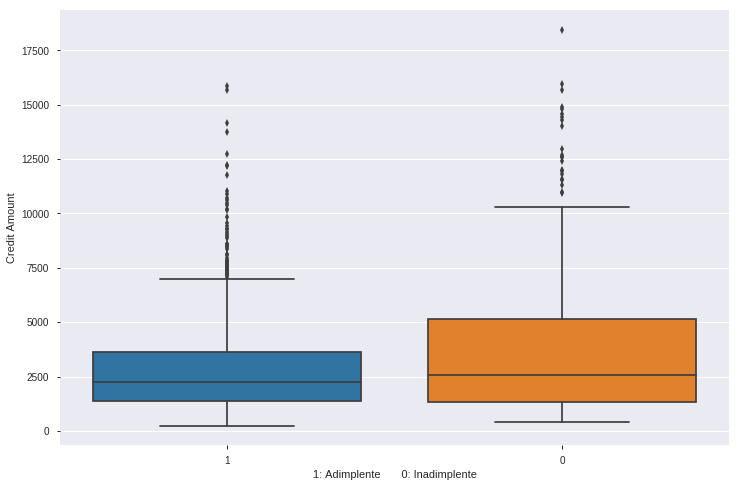

In [9]:
ax = sns.boxplot(x="Creditability", y="Credit Amount", data=df, order=[1, 0])
plt.xlabel('1: Adimplente       0: Inadimplente')
plt.gcf().set_size_inches(12, 8)

### Heatmap

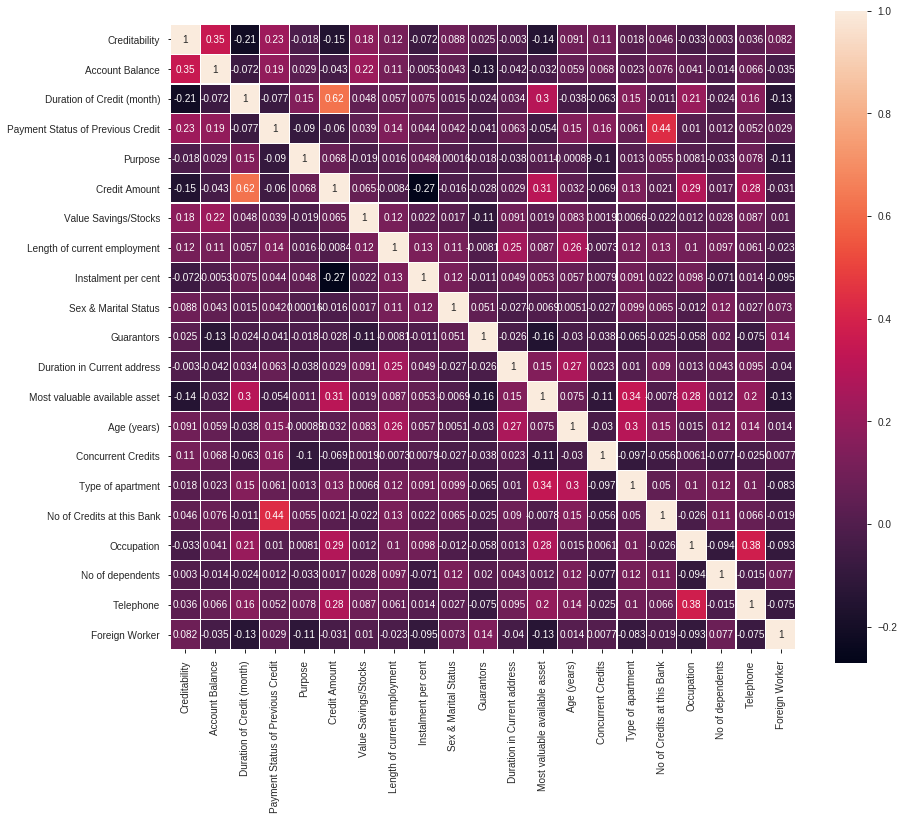

In [10]:
plt.figure(figsize=(14,12))
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

#### Podemos observar uma correlação positiva entre "Credit amount" e "Duration of Credit" de 0.62

In [11]:
credit1 = go.Bar(x = df[df["Creditability"]== 1]["Type of apartment"].value_counts().index.values,
                 y = df[df["Creditability"]== 1]["Type of apartment"].value_counts().values, name='Adimplente')

credit0 = go.Bar(x = df[df["Creditability"]== 0]["Type of apartment"].value_counts().index.values,
                 y = df[df["Creditability"]== 0]["Type of apartment"].value_counts().values, name="Inadimplente")

data = [credit1, credit0]

layout = go.Layout(title='Moradia')

fig = go.Figure(data=data, layout=layout)

fig.update_xaxes (ticktext = [ "Alugada" ,  "Própria" ,  "Outras"],
                  tickvals = ["1", "2", "3"])

py.iplot(fig)

### Pandas Profiling

Podemos facilitar o processo de análise de dados utilizando o pandas profiling, que é uma ferramenta capaz de gerar um relatório html com várias informações estatísticas e as principais características do dataframe em apenas uma linha de código.

In [12]:
prf = pp.ProfileReport(df)
prf

### Separação das variáveis de entrada da variável alvo (target)

In [13]:
feature_names = df.iloc[:, 1:21].columns
target = df.iloc[:1, 0:1].columns

data_features = df[feature_names]
data_target = df[target]

In [14]:
feature_names

Index(['Account_Balance', 'Duration_of_Credit_(month)',
       'Payment_Status_of_Previous_Credit', 'Purpose', 'Credit_Amount',
       'Value_Savings/Stocks', 'Length_of_current_employment',
       'Instalment_per_cent', 'Sex_&_Marital_Status', 'Guarantors',
       'Duration_in_Current_address', 'Most_valuable_available_asset',
       'Age_(years)', 'Concurrent_Credits', 'Type_of_apartment',
       'No_of_Credits_at_this_Bank', 'Occupation', 'No_of_dependents',
       'Telephone', 'Foreign_Worker'],
      dtype='object')

In [15]:
target

Index(['Creditability'], dtype='object')

Com o conjunto de dados definido, dividimos os dados em conjuntos de treinamento e teste, importando a função train_test_split.

A função train_test_split usa um randomizador para separar os dados em conjuntos de treinamento e teste. Neste caso, foram definidos 70% dos dados para treinamento e 30% para testes.

A semente aleatória (np.random.seed), é utilizada para garantir que os mesmos dados sejam usados em todas as execuções.

In [16]:
import numpy as np

from sklearn.model_selection import train_test_split
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target, 
                                                    train_size = 0.70, test_size = 0.30, random_state = 1)

### Construindo o modelo Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier 

rf = RandomForestClassifier()

### Treinando o modelo

In [18]:
rf.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Acima podemos observar os parâmetros padrão que serão utilizados para a construção do modelo.

### Matriz de Confusão - Utilizando a função PrintStats para compilar e exibir os resultados do modelo.

Matriz de Confusão - Utilizando a função PrintStats para compilar e exibir os resultados do modelo.
A Matriz de confusão é basicamente uma matriz com valores reais e valores preditos pelo classificador utilizado, onde podemos avaliar o desempenho do algorítmo.

O PrintStats toma como parâmetros uma matriz de confusão, rótulos de teste e rótulos de previsão e separa a matriz de confusão em suas partes constituintes.

In [19]:
def PrintStats(cmat, y_test, pred):
    tpos = cmat[0][0]
    fneg = cmat[1][1]
    fpos = cmat[0][1]
    tneg = cmat[1][0]

### Aplicando a função RunModel para treinar o modelo e gerar previsões em relação aos dados de teste

A função RunModel toma como entrada o modelo não treinado junto com todos os dados de teste e treinamento, incluindo rótulos. Ele treina o modelo, executa a previsão usando os dados de teste e retorna a matriz de confusão juntamente com os rótulos previstos.

In [20]:
def RunModel(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train.values.ravel())
    pred = model.predict(X_test)
    matrix = confusion_matrix(y_test, pred)
    return matrix, pred

Com as funções PrintStats e RunModel criadas, criamos um modelo para fazer a detecção de clientes inadimplentes. A detecção de risco de crédito é geralmente considerada um problema de duas classes, neste caso específico:

Classe 1: Clientes Inadimplentes (Em nossa variável target representada por "0")

Ou

Classe 2: Clientes Adimplentes (Em nossa variável target representada por "1")

O objetivo aqui é tentar determinar a qual classe uma transação específica pertence.

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import scikitplot as skplt

In [22]:
cmat, pred = RunModel(rf, X_train, y_train, X_test, y_test)

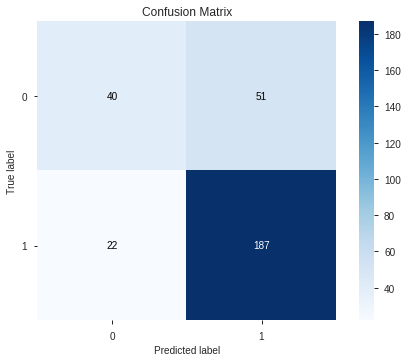

In [23]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, pred)

In [24]:
accuracy_score(y_test, pred)

0.7566666666666667

In [25]:
print (classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.65      0.44      0.52        91
           1       0.79      0.89      0.84       209

    accuracy                           0.76       300
   macro avg       0.72      0.67      0.68       300
weighted avg       0.74      0.76      0.74       300



Este primeiro modelo atingiu uma acurácia de 76% e foi capaz de identificar corretamente 89% dos clientes adimplentes (ver recall), mas apenas 44% dos clientes inadimplentes.

### Undersampling

Neste caso, vamos utilizar a técnica de undersampling para obter uma divisão uniforme entre clientes adimplentes e inadimplentes. Isso tornará o conjunto de treinamento pequeno, mas com dados suficientes para gerar um bom classificador.

In [26]:
bad_records = len(df[df.Creditability == 0]) 
bad_indices = df[df.Creditability == 0].index
good_indices = df[df.Creditability == 1].index

under_sample_indices = np.random.choice(good_indices, bad_records, False)
df_undersampled = df.iloc[np.concatenate([bad_indices, under_sample_indices]),:]
X_undersampled = df_undersampled.iloc[:,1:21]
Y_undersampled = df_undersampled.Creditability
X_undersampled_train, X_undersampled_test, Y_undersampled_train, Y_undersampled_test = train_test_split(X_undersampled, Y_undersampled, test_size = 0.30)

### Utilizando o "novo" classificador para os dados balanceados - Random Forest

In [27]:
rf_undersampled = RandomForestClassifier() 
cmat, pred = RunModel(rf_undersampled, X_undersampled_train, Y_undersampled_train, X_undersampled_test, Y_undersampled_test)
PrintStats(cmat, Y_undersampled_test, pred)

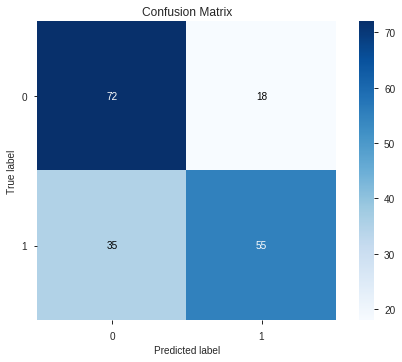

In [28]:
skplt.metrics.plot_confusion_matrix(Y_undersampled_test, pred)

In [29]:
accuracy_score(Y_undersampled_test, pred)

0.7055555555555556

In [30]:
print (classification_report(Y_undersampled_test, pred))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73        90
           1       0.75      0.61      0.67        90

    accuracy                           0.71       180
   macro avg       0.71      0.71      0.70       180
weighted avg       0.71      0.71      0.70       180



O modelo atingiu uma acurácia de 71% e apesar de identificar corretamente apenas 61% dos clientes adimplentes, a capacidade de identificar os inadimplentes subiu para 80%.

### Utilizando o "novo" classificador para os dados de teste originais

In [31]:
rf = RandomForestClassifier()
cmat, pred = RunModel(rf, X_undersampled_train, Y_undersampled_train, X_test, y_test)
PrintStats(cmat, y_test, pred)

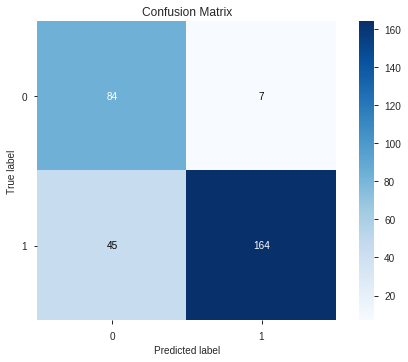

In [32]:
skplt.metrics.plot_confusion_matrix(y_test, pred)

In [33]:
accuracy_score(y_test, pred)

0.8266666666666667

In [34]:
from sklearn.metrics import classification_report
print (classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.65      0.92      0.76        91
           1       0.96      0.78      0.86       209

    accuracy                           0.83       300
   macro avg       0.81      0.85      0.81       300
weighted avg       0.87      0.83      0.83       300



Aplicando o novo modelo para os dados de teste originais, a acurácia aumentou para 83%, o recall para clientes adimplentes atingiu 78%, e para os inadimplentes aumentou consideravelmente para 92%!

### GridSearchCV - Otimização de Parâmetros - Regressão Logística

O GridSearchCV é um recurso da biblioteca Scikit-learn que nos ajuda a encontrar os melhores parâmetros para o modelo.

In [35]:
from sklearn.model_selection import GridSearchCV

### GridSearchCV - Otimização de Parâmetros - Random Forest

In [36]:
param_grid = {"criterion": ['entropy', 'gini'],
              "n_estimators": [25, 50, 75],
              "n_jobs": [1, 2, 3, 4],
              "max_features": ['auto', 0.1, 0.2, 0.3]}

grid_search_rf = GridSearchCV(rf, param_grid, scoring="precision")
grid_search_rf.fit(y_test, pred)

rf = grid_search_rf.best_estimator_ 
grid_search_rf.best_params_, grid_search_rf.best_score_

({'criterion': 'entropy',
  'max_features': 'auto',
  'n_estimators': 25,
  'n_jobs': 1},
 0.7858758448399312)

In [37]:
rf_undersampled = RandomForestClassifier(criterion = 'entropy', max_features = 'auto', n_estimators = 25, n_jobs = 1)
cmat, pred = RunModel(rf_undersampled, X_undersampled_train, Y_undersampled_train, X_undersampled_test, Y_undersampled_test)
PrintStats(cmat, Y_undersampled_test, pred)

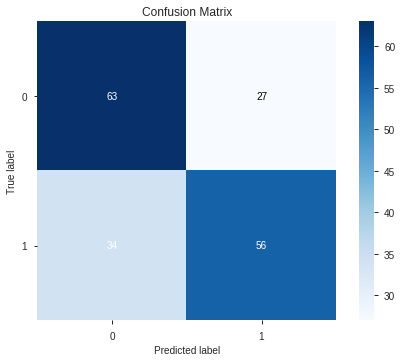

In [38]:
skplt.metrics.plot_confusion_matrix(Y_undersampled_test, pred)

In [39]:
accuracy_score(Y_undersampled_test, pred)

0.6611111111111111

In [40]:
print (classification_report(Y_undersampled_test, pred))

              precision    recall  f1-score   support

           0       0.65      0.70      0.67        90
           1       0.67      0.62      0.65        90

    accuracy                           0.66       180
   macro avg       0.66      0.66      0.66       180
weighted avg       0.66      0.66      0.66       180



### Utilizando o "novo" classificador para os dados de teste originais 

In [41]:
cmat, pred = RunModel(rf, X_undersampled_train, Y_undersampled_train, X_test, y_test)
PrintStats(cmat, y_test, pred)

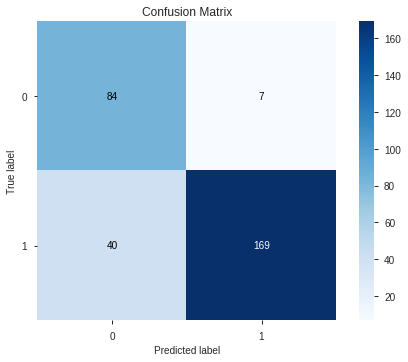

In [42]:
skplt.metrics.plot_confusion_matrix(y_test, pred)

In [43]:
accuracy_score(y_test, pred)

0.8433333333333334

In [44]:
print (classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.68      0.92      0.78        91
           1       0.96      0.81      0.88       209

    accuracy                           0.84       300
   macro avg       0.82      0.87      0.83       300
weighted avg       0.87      0.84      0.85       300



Com a otimização de alguns parâmetros o modelo agora atingiu uma acurácia de 84%, o recall para clientes adimplentes aumentou para 81% e para clientes inadimplentes se manteve em 92%.

### Medição de desempenho do modelo através da curva ROC e AUC

A curva "ROC" é uma curva de probabilidade que mostra o quanto o classificador consegue distinguir entre duas coisas, através de dois parâmetros: a taxa verdadeiro-positivo contra a taxa de falsos-positivos, ou seja, o número de vezes que o classificador acertou a predição contra o número de vezes que o classificador errou a predição.

O "AUC" é derivada da curva "ROC" e representa o grau ou medida de separabilidade. A AUC resume a curva ROC num único valor, calculando a “área sob a curva”. Quanto maior o AUC melhor o modelo está em prever 0s como 0s e 1s como 1s. Neste caso, quanto maior a AUC melhor o modelo está em distinguir entre transações de créditos ruins de créditos bons. O valor do AUC varia de 0,0 até 1,0.

Um modelo excelente tem AUC próximo ao 1, o que significa que tem boa medida de separabilidade. Um modelo pobre tem AUC próximo do 0, o que significa que tem a pior medida de separabilidade, ou seja, está prevendo 0s como 1s e 1s como 0s. E quando a AUC é 0,5, significa que o modelo não tem capacidade de separação de classe.

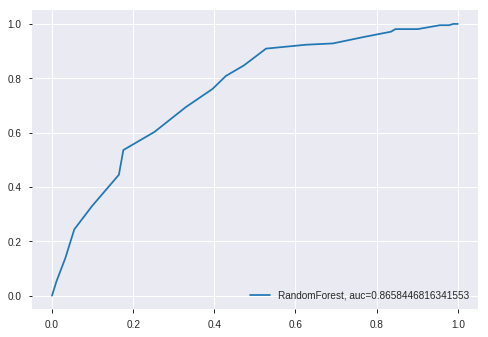

In [45]:
from sklearn import metrics   

clf = RandomForestClassifier(criterion='entropy', n_estimators = 25, n_jobs = 1, max_features='auto')
clf.fit(X_train, y_train)

y_pred_probability = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_probability)
auc = metrics.roc_auc_score(y_test, pred)
plt.plot(fpr,tpr,label="RandomForest, auc="+str(auc))
plt.legend(loc=4)
plt.show()

O modelo gerado atingiu uma auc de 86,58%.